# CarPrice Assignment(REGRESION)

In [75]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [76]:
#pip install sklearn

In [77]:
%matplotlib inline

In [78]:
data = pd.read_csv('CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Preprocessing

In [121]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [136]:
# Remove column name 
data = data.drop(columns=['drivewheel'])

In [148]:
data.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [149]:
data['car_ID'].value_counts()

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64

In [150]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [151]:
data['CarName'].value_counts()

120    6
115    6
85     6
107    4
66     3
      ..
55     1
61     1
51     1
52     1
142    1
Name: CarName, Length: 147, dtype: int64

In [152]:
data['fueltype'].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [153]:
data['aspiration'].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [154]:
data['doornumber'].value_counts()

0    115
1     90
Name: doornumber, dtype: int64

In [155]:
data['carbody'].value_counts()

3    96
2    70
4    25
1     8
0     6
Name: carbody, dtype: int64

In [159]:
data['carlength'].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: carlength, Length: 75, dtype: int64

In [160]:
data['carwidth'].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64

In [161]:
data['carheight'].value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64

In [162]:
data['curbweight'].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64

In [163]:
data['enginetype'].value_counts()

3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: enginetype, dtype: int64

In [164]:
data['cylindernumber'].value_counts()

2    159
3     24
1     11
0      5
6      4
4      1
5      1
Name: cylindernumber, dtype: int64

In [165]:
data['enginesize'].value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: enginesize, dtype: int64

In [166]:
data['fuelsystem'].value_counts()

5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: fuelsystem, dtype: int64

In [167]:
data['boreratio'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.39     6
3.33     6
3.05     6
3.54     6
3.70     5
3.01     5
3.35     4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.63     2
3.13     2
3.80     2
3.50     2
2.54     1
3.08     1
3.61     1
3.34     1
2.68     1
3.60     1
2.92     1
3.76     1
2.99     1
Name: boreratio, dtype: int64

In [168]:
data['compressionratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64

In [169]:
data['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64

In [170]:
data['peakrpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5800     7
5250     7
5100     5
4150     5
4200     5
4350     4
4750     4
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64

In [171]:
data['citympg'].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: citympg, dtype: int64

In [172]:
data['price'].value_counts()

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [174]:
data.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,174.049268,65.907805,53.724878,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,12.337289,2.145204,2.443522,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.100000,60.300000,47.800000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,166.300000,64.100000,52.000000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,173.200000,65.500000,54.100000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,183.100000,66.900000,55.500000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,208.100000,72.300000,59.800000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [175]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Data visualization

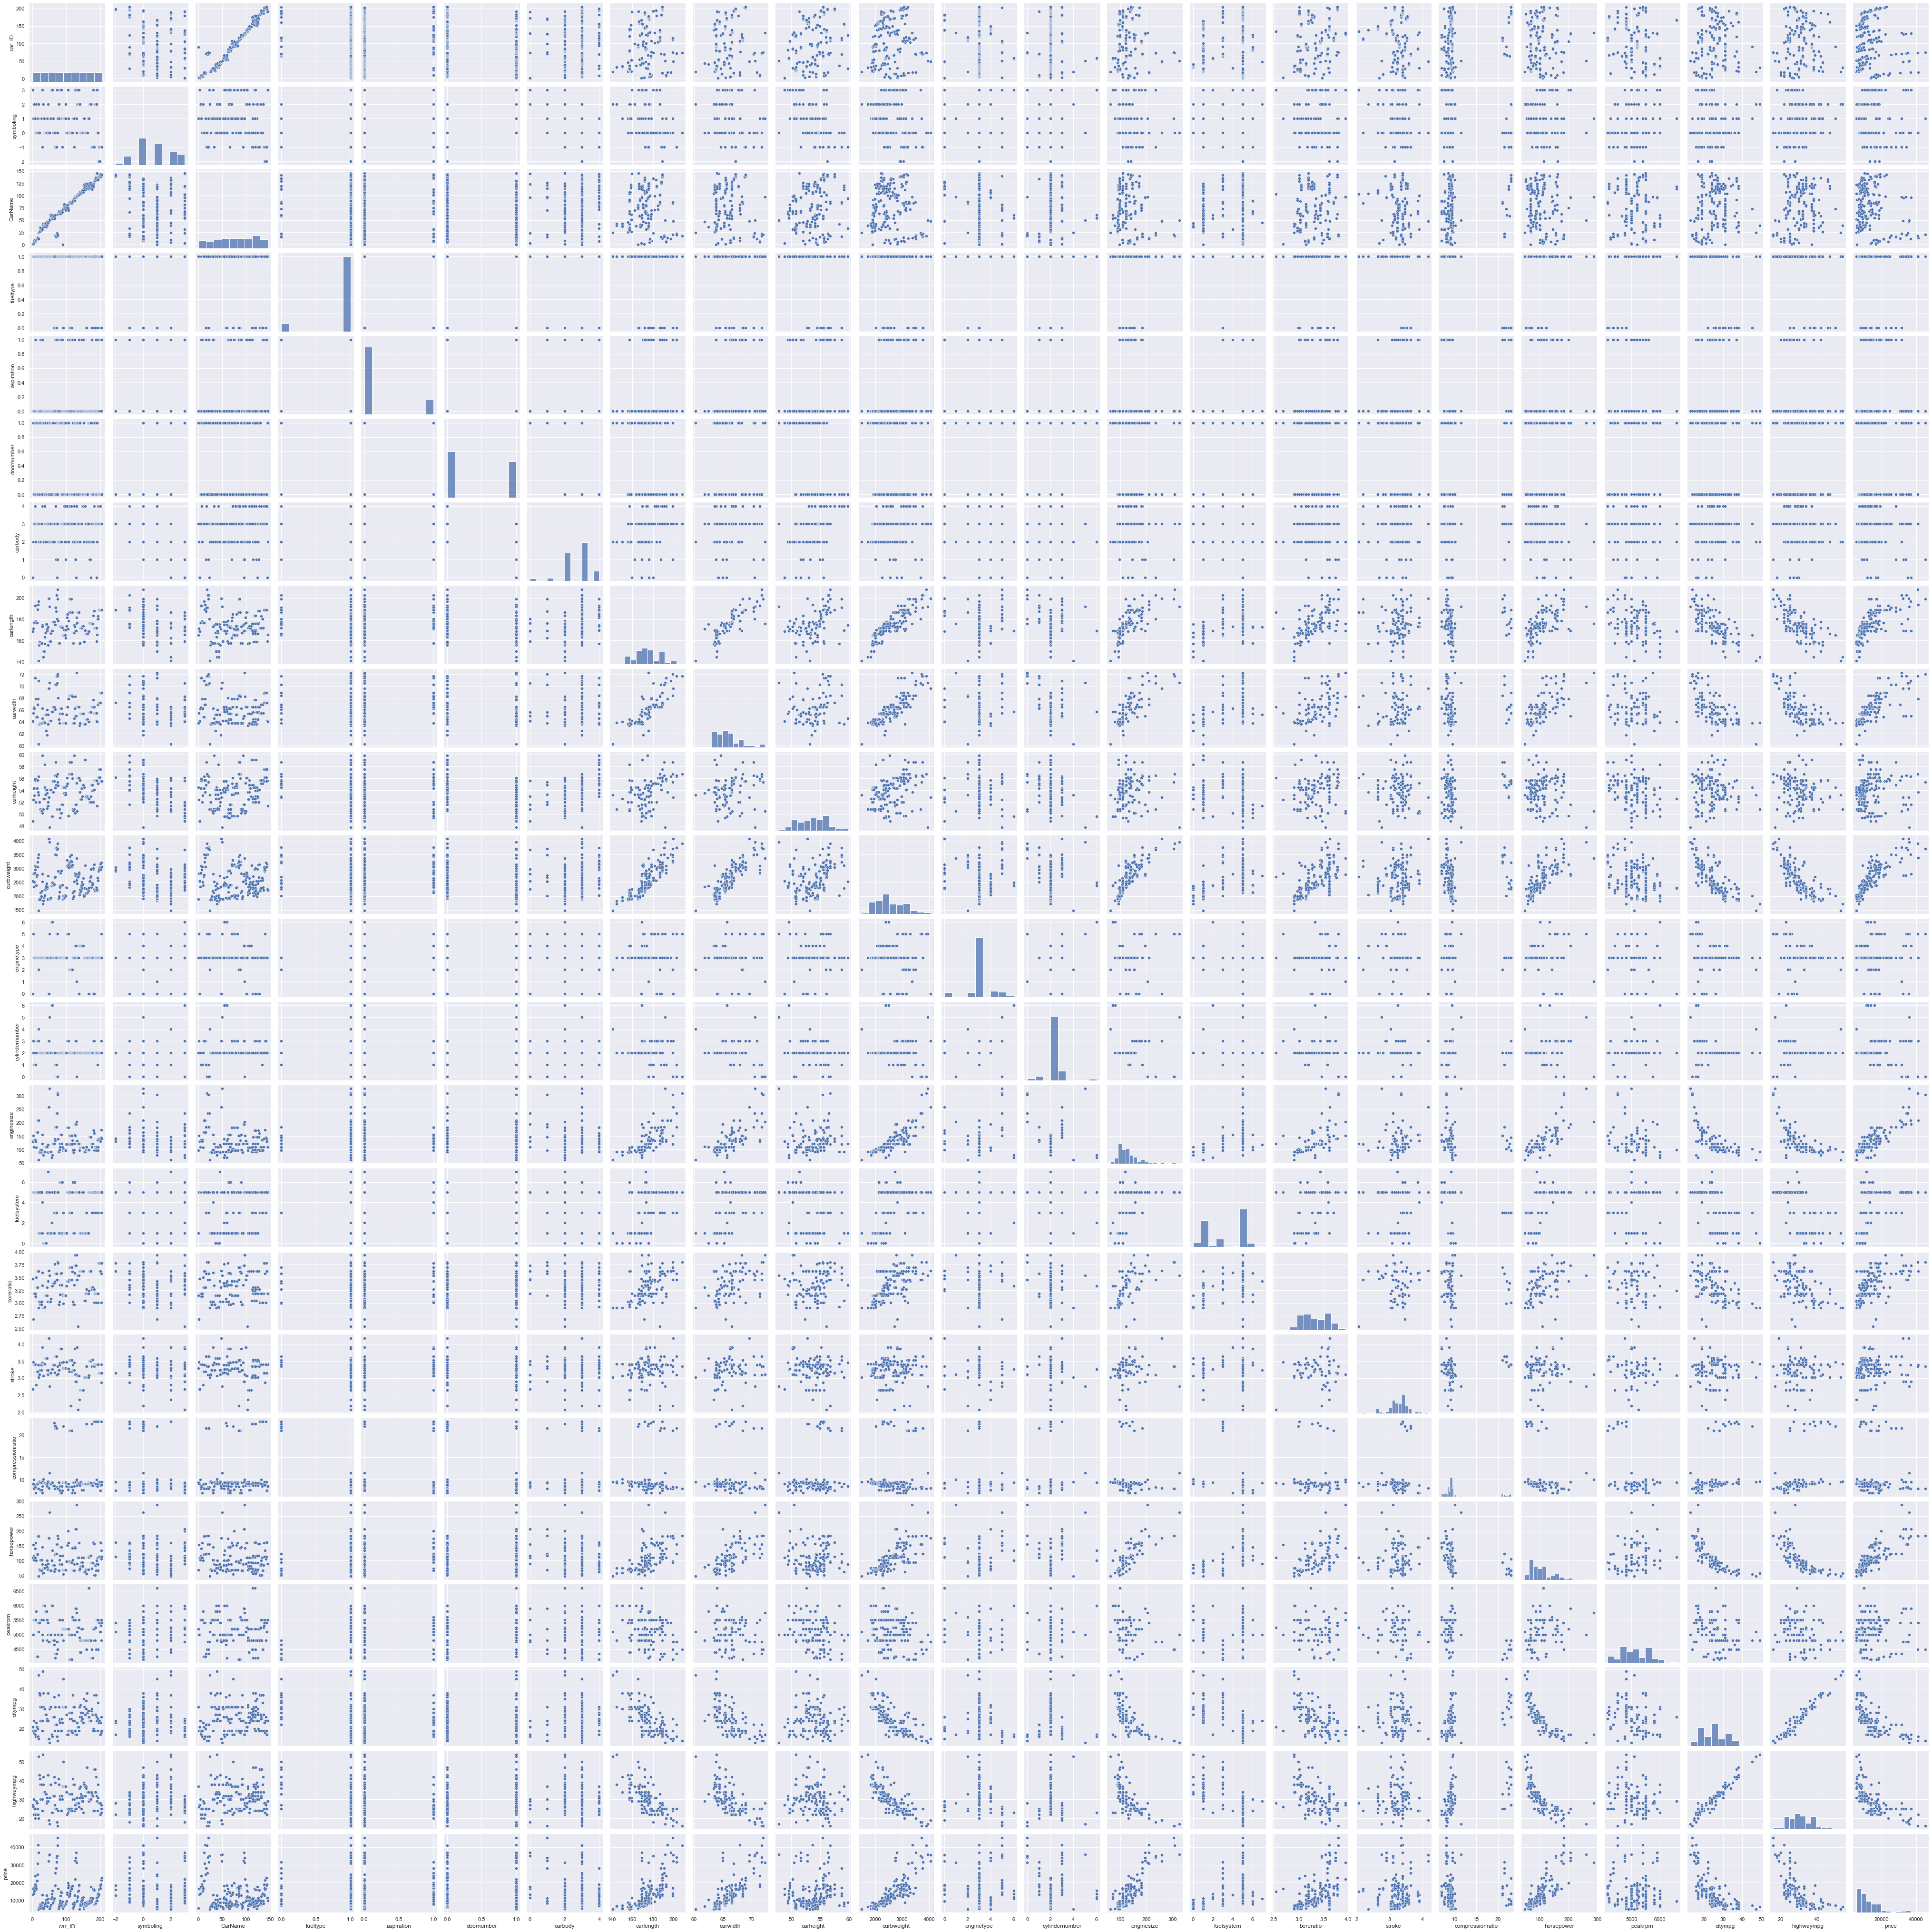

In [177]:
sns.pairplot(data)

e:\Users\work\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

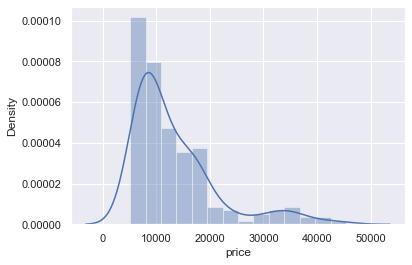

In [179]:
sns.distplot(data['price'])

<AxesSubplot:>

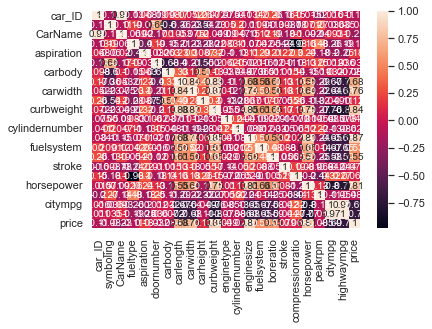

In [180]:
sns.heatmap(data.corr(),annot=True)

In [181]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [182]:
data.select_dtypes(include='object').nunique()

Series([], dtype: float64)

#  Visualizing Outliers Using Box Plot

e:\Users\work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

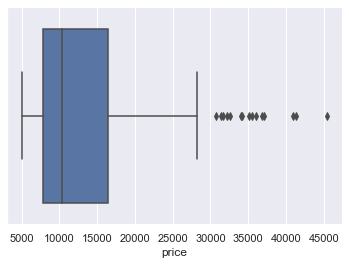

In [215]:
# Box Plot
import seaborn as sns
sns.boxplot(data['price'])

In [183]:
data.isna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# LabelEncoding

In [184]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")

In [185]:
from sklearn import preprocessing

# loop over each column in the dataframe where dtypes is object
for col in data.select_dtypes(include=['object']).columns:
    
   # initialize a labelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    #transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    #print the column name and the unique encoder values
    print(f"{col}: {data[col].unique()}")

In [186]:
data.dtypes

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [188]:
X = data[['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [190]:
y = data['price']

# Train/test

In [191]:
import sys


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 101)

# algorithm

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
lm = LinearRegression()

In [196]:
lm.fit(X_train,y_train)

LinearRegression()

In [197]:
print(lm.intercept_)

4.001776687800884e-11


In [198]:
lm.coef_

array([-5.52857437e-14,  1.60642059e-13,  7.25518188e-14, -4.96343982e-12,
        2.52739495e-13,  2.60121821e-13, -6.49838438e-13,  1.00870349e-13,
       -7.92541859e-13, -4.37812228e-14,  6.77998709e-15,  3.48169722e-13,
       -3.10541348e-13, -3.53786205e-14, -2.14759040e-13, -2.36391794e-12,
       -1.27404994e-12, -3.40572247e-13,  1.95533496e-14,  7.95226313e-16,
       -2.74597806e-13,  2.72424819e-13,  1.00000000e+00])

In [199]:
X_train.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [200]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [201]:
cdf

,Coeff
car_ID,-5.528574e-14
symboling,1.606421e-13
CarName,7.255182e-14
fueltype,-4.963440e-12
aspiration,2.527395e-13
doornumber,2.601218e-13
carbody,-6.498384e-13
carlength,1.008703e-13
carwidth,-7.925419e-13
carheight,-4.378122e-14


In [202]:
predictions = lm.predict(X_test)

In [203]:
predictions

array([ 6229.   ,  8195.   , 15690.   ,  7957.   , 12440.   , 17199.   ,
       12170.   ,  5499.   ,  7895.   ,  7129.   , 11259.   , 18280.   ,
        6669.   ,  6488.   , 11694.   , 18344.   ,  6989.   ,  8948.   ,
        6855.   ,  6649.   , 10345.   , 12945.   ,  6918.   ,  7395.   ,
        8449.   , 35550.   ,  5195.   ,  7898.   ,  7995.   ,  9233.   ,
        6692.   , 10945.   , 19045.   , 16500.   , 20970.   , 16515.   ,
        7499.   ,  6377.   ,  9549.   ,  8845.   ,  5399.   ,  7898.   ,
       45400.   , 15998.   ,  5572.   , 41315.   ,  7299.   ,  8013.   ,
       15040.   , 22625.   ,  5151.   , 10595.   ,  5348.   , 17450.   ,
       30760.   , 16500.   ,  6785.   , 11199.   , 11248.   , 17859.167,
        7788.   ,  7295.   ,  7099.   ,  6529.   ,  8916.5  ,  9995.   ,
       22470.   ,  6695.   ,  7349.   ,  9298.   , 34028.   ,  7775.   ,
       13200.   , 11245.   , 13415.   ,  6229.   ,  9959.   ,  9988.   ,
       21105.   ,  6795.   , 18150.   , 22018.   ])

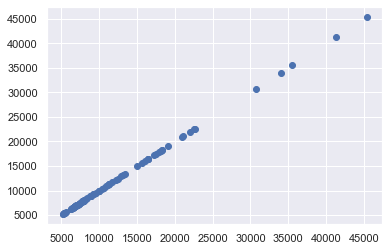

In [204]:
plt.scatter(y_test,predictions)

e:\Users\work\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

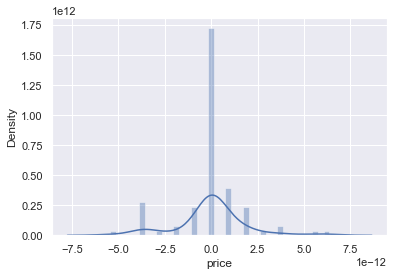

In [205]:
sns.distplot(y_test-predictions)

In [206]:
y_test

120     6229.0
185     8195.0
180    15690.0
119     7957.0
109    12440.0
        ...   
175     9988.0
13     21105.0
52      6795.0
117    18150.0
125    22018.0
Name: price, Length: 82, dtype: float64

# metrics

In [207]:
from sklearn import metrics

In [208]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0315000885961258e-12
MSE: 3.338985155549416e-24
RMSE: 1.827289018067316e-12


In [209]:
 metrics.mean_absolute_error(y_test, predictions)

1.0315000885961258e-12

In [210]:
metrics.mean_squared_error(y_test, predictions)

3.338985155549416e-24

In [211]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.827289018067316e-12